# PMP Portrait Plot: Mean Climate, comparing CMIP5 & CMIP6 models

Generate a static image of Portrait plot for mean climate metrics obtained from CMIP5 and CMIP6 models, and compare multi-model averaged statistics from each group.

Written by Jiwoo Lee (LLNL/PCMDI)

Last update: 2022. 10

## 1. Read data from JSON files

Input data for portrait plot is expected as a set a (stacked or list of) 2-d numpy array(s) with list of strings for x and y axes labels. 

### 1.1 Download PMP output JSON files for CMIP models <a name="download"></a>

In [1]:
import glob
import os
import numpy as np
import requests
import pandas as pd
from pcmdi_metrics.graphics import download_archived_results

PMP output files downloadable from the [PMP results archive](https://github.com/PCMDI/pcmdi_metrics_results_archive). 

In [2]:
vars = ['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 
        'ta-200', 'ta-850', 'tas', 'tauu', 'ts', 'ua-200', 'ua-850', 'va-200', 'va-850', 'zg-500']

In [3]:
json_dir = './json_files'

In [4]:
mip = "cmip5"
exp = "historical"
data_version = "v20220928"

In [5]:
for var in vars:
    path = "metrics_results/mean_climate/"+mip+"/"+exp+"/"+data_version+"/"+var+"."+mip+"."+exp+".regrid2.2p5x2p5."+data_version+".json"
    download_archived_results(path, json_dir)

In [6]:
mip = "cmip6"
exp = "historical"
data_version = "v20220928"

In [7]:
for var in vars:
    path = "metrics_results/mean_climate/"+mip+"/"+exp+"/"+data_version+"/"+var+"."+mip+"."+exp+".regrid2.2p5x2p5."+data_version+".json"
    download_archived_results(path, json_dir)

Check JSON files

In [8]:
json_list_1 = sorted(glob.glob(os.path.join(json_dir, '*.cmip5.' + exp + '*' + data_version + '.json')))
json_list_2 = sorted(glob.glob(os.path.join(json_dir, '*.cmip6.' + exp + '*' + data_version + '.json')))

In [9]:
print('CMIP5 JSON files:')
for i, json_file in enumerate(json_list_1):
    print(i+1, json_file.split('/')[-1])
    
print('CMIP6 JSON files:')
for i, json_file in enumerate(json_list_2):
    print(i+1, json_file.split('/')[-1])

CMIP5 JSON files:
1 pr.cmip5.historical.regrid2.2p5x2p5.v20220928.json
2 prw.cmip5.historical.regrid2.2p5x2p5.v20220928.json
3 psl.cmip5.historical.regrid2.2p5x2p5.v20220928.json
4 rlds.cmip5.historical.regrid2.2p5x2p5.v20220928.json
5 rltcre.cmip5.historical.regrid2.2p5x2p5.v20220928.json
6 rlus.cmip5.historical.regrid2.2p5x2p5.v20220928.json
7 rlut.cmip5.historical.regrid2.2p5x2p5.v20220928.json
8 rlutcs.cmip5.historical.regrid2.2p5x2p5.v20220928.json
9 rsds.cmip5.historical.regrid2.2p5x2p5.v20220928.json
10 rsdscs.cmip5.historical.regrid2.2p5x2p5.v20220928.json
11 rsdt.cmip5.historical.regrid2.2p5x2p5.v20220928.json
12 rstcre.cmip5.historical.regrid2.2p5x2p5.v20220928.json
13 rsut.cmip5.historical.regrid2.2p5x2p5.v20220928.json
14 rsutcs.cmip5.historical.regrid2.2p5x2p5.v20220928.json
15 sfcWind.cmip5.historical.regrid2.2p5x2p5.v20220928.json
16 ta-200.cmip5.historical.regrid2.2p5x2p5.v20220928.json
17 ta-850.cmip5.historical.regrid2.2p5x2p5.v20220928.json
18 tas.cmip5.historical.re

### 1.2 Extract data from JSON files <a name="extract"></a>

Use `Metrics` class (that use `read_mean_clim_json_files` function underneath) to extract data from the above JSON files.

#### Parameters
- `json_list`: list of string, where each element is for path/file for PMP output JSON files

#### Returned object includes
- `df_dict`: dictionary that has `[stat][season][region]` hierarchy structure storing pandas dataframe for metric numbers (Rows: models, Columns: variables (i.e., 2d array)
- `var_list`: list of string, all variables from JSON files
- `var_unit_list`: list of string, all variables and its units from JSON files
- `var_ref_dict`: dictonary for reference dataset used for each variable
- `regions`: list of string, regions
- `stats`: list of string, statistics

In [10]:
from pcmdi_metrics.graphics import Metrics

In [11]:
library_cmip5 = Metrics(json_list_1, mip="cmip5")

In [12]:
library_cmip6 = Metrics(json_list_2, mip="cmip6")

In [13]:
stat = 'rms_xy'
seasons = ['djf', 'mam', 'jja', 'son']
region = 'global'

## Select only certain models *(optional)*

In [14]:
selected_models = ['ACCESS', 'BCC', 'CESM', 'Can', 'FGOALS', 'FIO-ESM', 'GFDL', 'IPSL', 'MIROC', 'MPI', 'MRI', 'NorESM']


def selected_models_only(df, selected_models):
    # Selected models only
    model_names = df['model'].tolist()
    for model_name in model_names:
        drop_model = True
        for keyword in selected_models:
            if keyword in model_name:
                drop_model = False
                break
        if drop_model:
            df.drop(df.loc[df['model']==model_name].index, inplace=True)
        df.reset_index(drop=True, inplace=True)
    return df

In [15]:
for season in seasons:
    # Selected models only
    library_cmip5.df_dict[stat][season][region] = selected_models_only(library_cmip5.df_dict[stat][season][region], selected_models)
    library_cmip6.df_dict[stat][season][region] = selected_models_only(library_cmip6.df_dict[stat][season][region], selected_models) 

## Merge data

In [16]:
# merge dataframes
combined = library_cmip5.merge(library_cmip6)

### Add rows of multi-model average statistics for each CMIP group

In [17]:
for season in seasons:

    # mean value of statistics from multi models in each CMIP
    combined.df_dict[stat][season][region].loc['CMIP5 mean'] = library_cmip5.df_dict[stat][season][region].mean(numeric_only=True, skipna=True)
    combined.df_dict[stat][season][region].loc['CMIP6 mean'] = library_cmip6.df_dict[stat][season][region].mean(numeric_only=True, skipna=True)

    combined.df_dict[stat][season][region].at['CMIP5 mean', 'model'] = 'CMIP5 mean'
    combined.df_dict[stat][season][region].at['CMIP6 mean', 'model'] = 'CMIP6 mean'

### Customize variables to show

In [18]:
var_list = sorted(combined.var_list)

# temporary
var_list.remove('sfcWind')
var_list.remove('ta-850')
var_list.remove('ua-850')
var_list.remove('ua-200')
var_list.remove('va-850')
var_list.remove('va-200')
var_list.remove('tauu')

print('var_list:', var_list)

var_list: ['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'ta-200', 'tas', 'ts', 'zg-500']


### Getting ready for plotting...

In [19]:
#combined.df_dict[stat][season][region]

In [20]:
landscape = True

data = dict()

for season in seasons:
    
    if landscape:
        data[season] = combined.df_dict[stat][season][region][var_list].to_numpy().T
    else:
        data[season] = combined.df_dict[stat][season][region][var_list].to_numpy()

In [21]:
data_all = np.stack([data['djf'], data['mam'], data['jja'], data['son']])
model_names = combined.df_dict[stat][season][region]['model'].tolist()

print('data.shape:', data_all.shape)
print('len(var_list): ', len(var_list))
print('len(model_names): ', len(model_names))

data.shape: (4, 18, 57)
len(var_list):  18
len(model_names):  57


In [22]:
if landscape:
    yaxis_labels = var_list
    xaxis_labels = model_names
else:
    xaxis_labels = var_list
    yaxis_labels = model_names

### 1.4 Normalize each column by its median

Use `normalize_by_median` function.

#### Parameters
- `data`: 2d numpy array
- `axis`: 0 (normalize each column) or 1 (normalize each row), default=0 

#### Return
- `data_nor`: 2d numpy array

In [23]:
if landscape:
    axis = 1
    figsize = (40, 10)
else:
    axis = 0
    figsize = (18, 25)

In [24]:
from pcmdi_metrics.graphics import normalize_by_median

data_djf_nor = normalize_by_median(data['djf'], axis=axis)
data_mam_nor = normalize_by_median(data['mam'], axis=axis)
data_jja_nor = normalize_by_median(data['jja'], axis=axis)
data_son_nor = normalize_by_median(data['son'], axis=axis)

In [25]:
data_all_nor = np.stack([data_djf_nor, data_mam_nor, data_jja_nor, data_son_nor])
data_all_nor.shape

(4, 18, 57)

## 2. Matplotlib-based PMP Visualization Function

In [26]:
from pcmdi_metrics.graphics import portrait_plot

<p id="parameters"></p>

Parameters
----------
- `data`: 2d numpy array, a list of 2d numpy arrays, or a 3d numpy array (i.e. stacked 2d numpy arrays)
- `xaxis_labels`: list of strings, labels for xaixs. Number of list element must consistent to x-axis,
                  or 0 (empty list) to turn off xaxis tick labels
- `yaxis_labels`: list of strings, labels for yaxis. Number of list element must consistent to y-axis,
                  or 0 (empty list) to turn off yaxis tick labels
- `fig`: `matplotlib.figure` instance to which the portrait plot is plotted.
         If not provided, use current axes or create a new one.  Optional.
- `ax`: `matplotlib.axes.Axes` instance to which the portrait plot is plotted.
        If not provided, use current axes or create a new one.  Optional.
- `annotate`: bool, default=False, add annotating text if true,
              but work only for heatmap style map (i.e., no triangles)
- `annotate_data`: 2d numpy array, default=None. If None, the image's data is used.  Optional.
- `annotate_fontsize`: number (int/float), default=15. Font size for annotation
- `annotate_format`: format for annotate value, default="{x:.2f}"
- `figsize`: tuple of two numbers (width, height), default=(12, 10), figure size in inches
- `vrange`: tuple of two numbers, range of value for colorbar.  Optional.
- `xaxis_fontsize`: number, default=15, font size for xaxis tick labels.  Optional.
- `yaxis_fontsize`: number, default=15, font size for yaxis tick labels.  Optional.
- `inner_line_color`: string, default="k" (black), color for inner lines (triangle edge lines).  Optional.
- `inner_line_width`: float, default=0.5, line width for inner lines (triangle edge lines).  Optional.
- `cmap`: string, default="RdBu_r", name of matplotlib colormap.  Optional.
- `cmap_bounds`: list of numbers.  If given, discrete colors are applied.  Optional.
- `cbar_label`: string, default=None, label for colorbar.  Optional.
- `cbar_label_fontsize`: number, default=15, font size for colorbar labels.  Optional.
- `cbar_tick_fontsize`: number, default=12, font size for colorbar tick labels.  Optional.
- `cbar_kw`: A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
- `colorbar_off`: Trun off colorbar if True.  Optional.
- `missing_color`: color, default="grey", `matplotlib.axes.Axes.set_facecolor` parameter.  Optional.
- `invert_yaxis`: bool, default=True, place y=0 at top on the plot.  Optional.
- `box_as_square`: bool, default=False, make each box as square.  Optional.
- `legend_on`: bool, default=False, show legend (only for 2 or 4 triangles portrait plot).  Optional.
- `legend_labels`: list of strings, legend labels for triangls.  Optional.
- `legend_box_xy`: tuple of numbers, position of legend box's upper-left corner.  Optional.
                   (lower-left if `invert_yaxis=False`), in `axes` coordinate.  Optional.
- `legend_box_size`: number, size of legend box.  Optional.
- `legend_lw`: number, line width of legend, default=1.  Optional.
- `legend_fontsize`: number, font size for legend, default=14.  Optional.
- `logo_rect`: sequence of float. The dimensions [left, bottom, width, height] of the the PMP logo.  Optional.
               All quantities are in fractions of figure width and height.  Optional
- `logo_off`: bool, default=False, turn off PMP logo.  Optional.
- `debug`: bool, default=False, if true print more message when running that help debugging.  Optional.

Return
------
- `fig`: matplotlib component for figure
- `ax`: matplotlib component for axis
- `cbar`: matplotlib component for colorbar (not returned if colorbar_off=True)

## 3. Plot

## 3.1 Portrait Plot with 4 Triangles (4 seasons)

- data order is clockwise from top: top, right, bottom, left

Text(0.5, 0.5, 'Example')

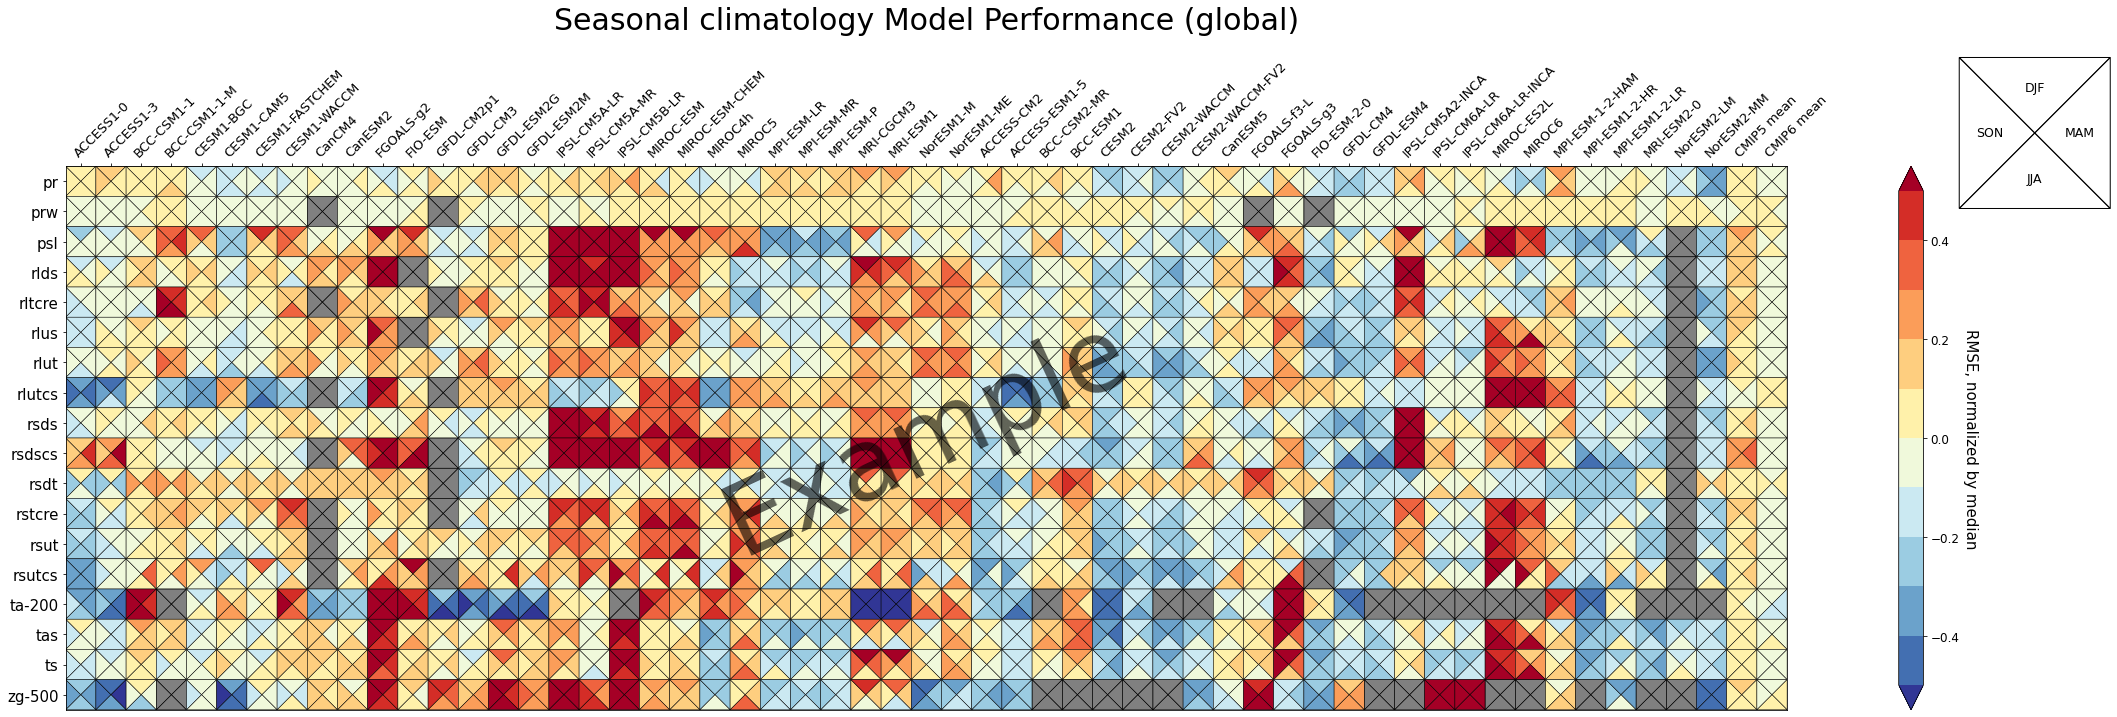

In [27]:
fig, ax, cbar = portrait_plot(data_all_nor,
                              xaxis_labels=xaxis_labels, 
                              yaxis_labels=yaxis_labels, 
                              cbar_label='RMSE, normalized by median',
                              box_as_square=True,
                              vrange=(-0.5, 0.5),
                              figsize=figsize,
                              xaxis_fontsize=13,
                              cmap='RdYlBu_r',
                              cmap_bounds=[-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5],
                              cbar_kw={"extend": "both"},
                              missing_color='grey',
                              legend_on=True,
                              legend_labels=['DJF', 'MAM', 'JJA', 'SON'],
                              #legend_box_xy=(1.25, 1),
                              legend_box_xy=(1.1, 1.2),
                              legend_box_size=5,
                              legend_lw=1,
                              legend_fontsize=12.5,
                              #logo_rect = [0.85, 0.15, 0.07, 0.07],
                              logo_off=True,
                             )
ax.set_xticklabels(xaxis_labels, rotation=45, va='bottom', ha="left")

# Add title
ax.set_title("Seasonal climatology Model Performance (global)", fontsize=30, pad=30)

# Add Watermark
ax.text(0.5, 0.5, 'Example', transform=ax.transAxes,
        fontsize=100, color='black', alpha=0.6,
        ha='center', va='center', rotation='25')

In [28]:
# Save figure as an image file
fig.savefig('mean_clim_portrait_plot_4seasons_cmip56.png', facecolor='w', bbox_inches='tight')